In [1]:
import pickle
from functools import lru_cache
from scipy.special import softmax 

import numpy as np 
from pynput import keyboard
from IPython.display import clear_output
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt 
import seaborn as sns 

from utils.auxiliary import *
from utils.maze import girdmaze
from utils.model import *
from utils.viz import viz 
viz.get_style()

# 1. Experiment paradigm

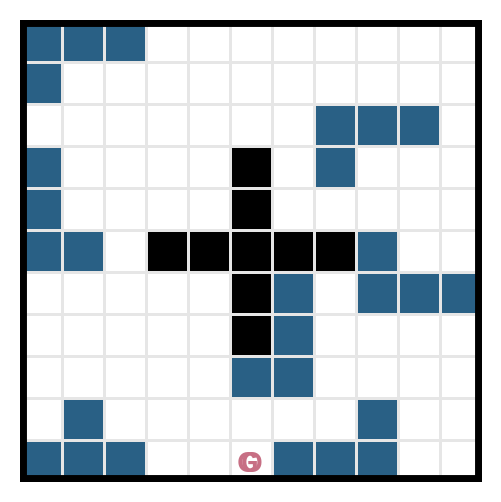

In [3]:
env = girdmaze()
_ = env.reset()
listener = keyboard.Listener(
    on_press=env.on_press,
    on_release=env.on_release)
listener.start()
done = False
while True:
    fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    clear_output(True)
    env.render(ax)
    plt.show()
    if done: break
    act = env.wait_until()
    _, _, done = env.step(act)
listener.stop()

# 2. The basic value-guided-construal

In [2]:
full_grid2 = [
    "333.......S",
    "3..........",
    ".......111.",
    "4....#.1...",
    "4....#.....",
    "44.#####0..",
    ".....#6.000",
    ".....#6....",
    ".....66....",
    ".5......2..",
    "555..G222.."
]

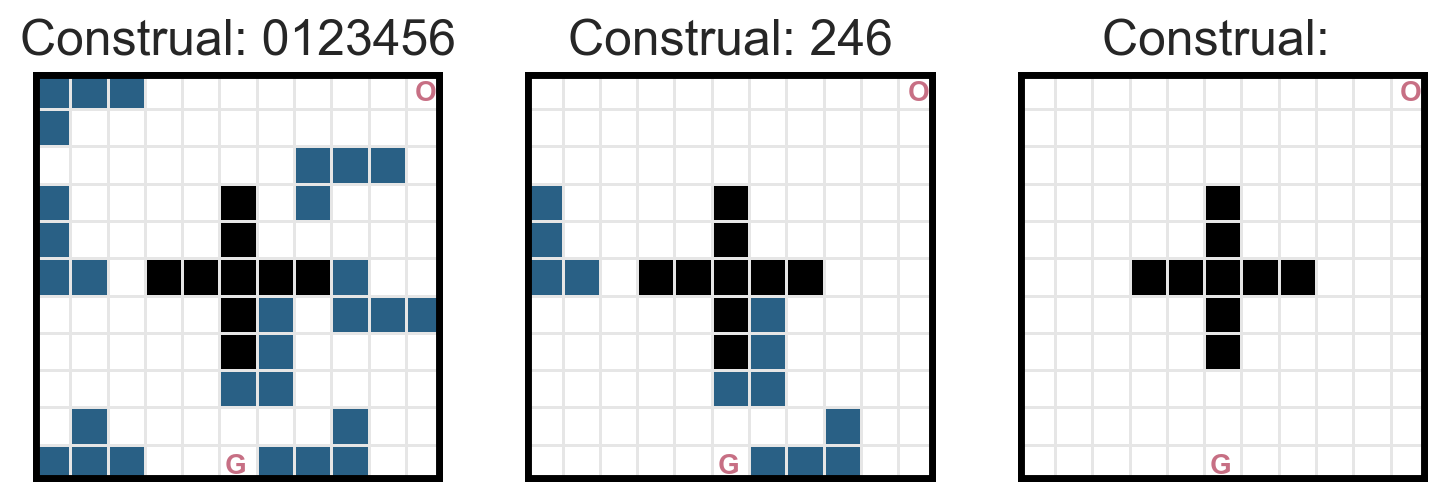

In [3]:
configs = ['0123456', '246', '']
fig, axs = plt.subplots(1, 3, figsize=(9, 3.2))
for i, config in enumerate(configs):
    ax = axs[i]
    env = girdmaze(**{'config': config})
    env.render(ax)
    ax.set_title(f'Construal: {config}')


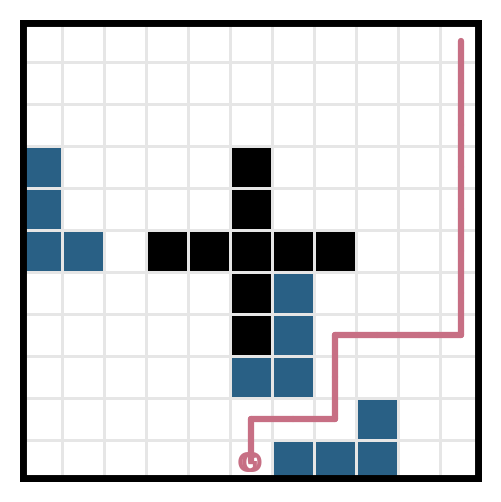

Construal: 246, vor:-101.99990235208801


In [5]:
c_config = '246'
c = construal(config=c_config)
c_info = c.eval()
env = girdmaze(config=c_config)
c.render(env, c_info['pi_c'])
print(f'Construal: {c_config}, vor:{c_info["vor_c"]}')

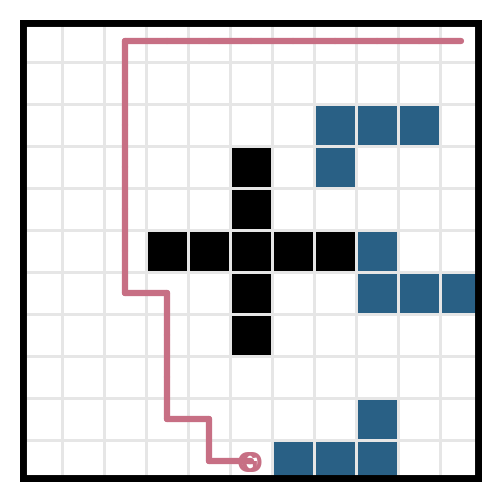

Construal: 012, vor:-101.99990806643842


In [6]:
c_config = '012'
c = construal(config=c_config)
c_info = c.eval()
env = girdmaze(config=c_config)
c.render(env, c_info['pi_c'])
print(f'Construal: {c_config}, vor:{c_info["vor_c"]}')

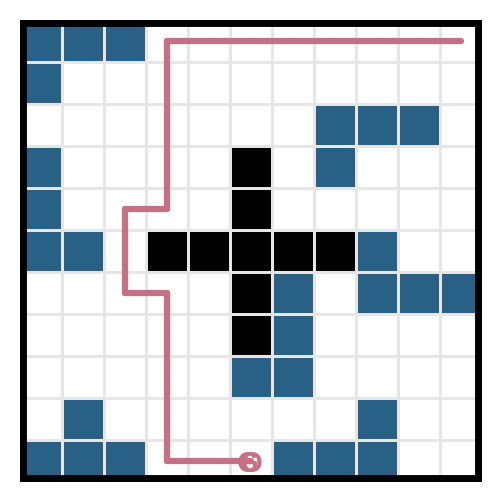

Construal: 0123456, vor:-24.2094780022625


In [9]:
c_config = '0123456'
c = construal(config=c_config)
c_info = c.eval()
env = girdmaze(config=c_config)
c.render(env, c_info['pi_c'])
print(f'Construal: {c_config}, vor:{c_info["vor_c"]}')

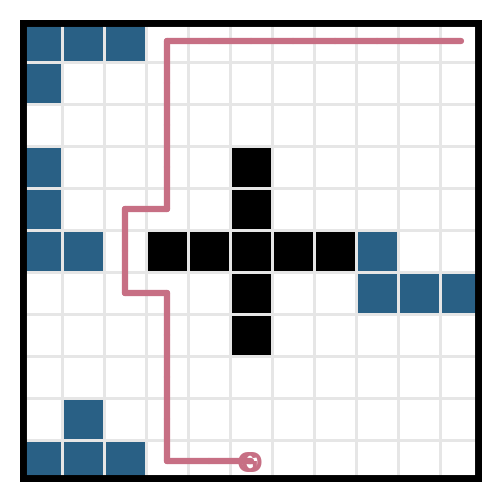

Construal: 0345, vor:-21.2094780022625


In [8]:
c_config = '0345'
c = construal(config=c_config)
c_info = c.eval()
env = girdmaze(config=c_config)
c.render(env, c_info['pi_c'])
print(f'Construal: {c_config}, vor:{c_info["vor_c"]}')

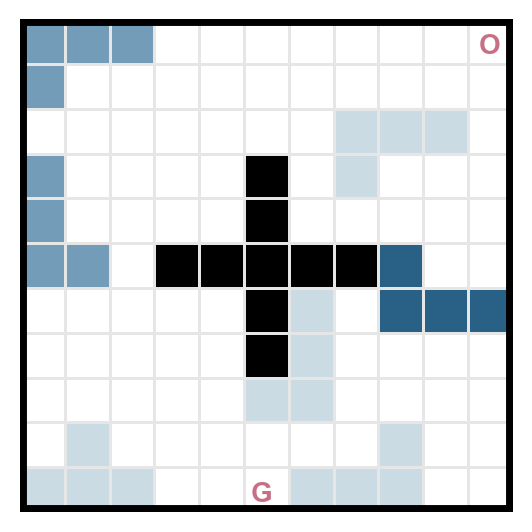

In [10]:
model = baseVGC(params={'alpha': .1})
model.load_consts('data/all_c_info.pkl')
p_obst = model.p_obst()
norm_p_obst = p_obst / p_obst.max()
env = girdmaze(**{
    'construal': '0123456', 
    'value': {k: .4+.3*norm_p_obst[int(k)] for k in list('0123456')}
    })
fig, ax = plt.subplots(1, 1, figsize=(3.2, 3.2))
env.render(ax)

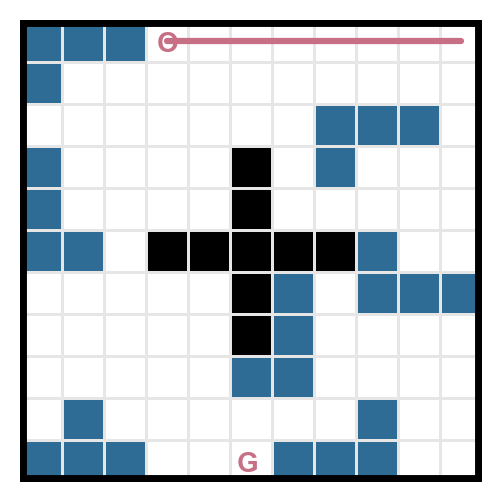

In [2]:
c_config = '012'
c = construal(config=c_config)
c_info = c.eval()
env = girdmaze(**{'construal': '0123456'})
c.render(env, c_info['pi_c'])